# Higher Education =? Happiness

## Project By: Kylie Dougherty

My goal in this project is to investigate the relationship between higher education and reported happiness in countries around the world. Does such a relationship exist in the first place? If a country has highly rated universities, are their citizens inherently happy? Who is even included in happiness? Who gets to attend these highly rated universities?

These are just a few of the questions I'm keeping in mind through my investigations. If there is no definitive answer to any of them, I will do my utmost to speculate based on what is present.

The two datasets I am choosing to look at are the world happiness rankings of 2015 and top 200 rated universities throughout the world in 2015. I did not pick that year because of any inclination toward it, but rather that was the overlapping year for the data. Should I have taken a different approach with this project, I could analyze how these ratings change over a number of years, but for now I would just like to investigate what is present.

In [1]:
#First Step: import all the necessary libraries

import numpy as np              
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the 2015 world happiness dataset

hapdata = pd.read_csv("2015.csv")
hapdata.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## 2015 World Happiness Data Dictionary

1. Country - Name of country
2. Region - Part of the world country is in
3. Happiness Rank - Where the country scores relative to the rest of the world
4. Happiness Score - Where citizens rank their happiness in the country on a scale of 1-10
5. Standard Error - Potential error in the data (will not really be looked at)
6. Economy (GDP per Capita) - A component of the happiness score (will not really be looked at)
7. Family - A component of the happiness score (will not really be looked at)
8. Health (Life Expectancy) - A component of the happiness score (will not really be looked at)
9. Freedom - A component of the happiness score (will not really be looked at)
10. Trust (Government Corruption) - A component of the happiness score (will not really be looked at)
11. Generosity - A component of the happiness score (will not really be looked at)
12. Dystopia Residual - A component of the happiness score (will not really be looked at)

For the components I'm not really looking at for this project, I think they would be very interesting to look into another time. For now, I'm looking at the larger part: the happiness score.

In [3]:
#Import the top world universities dataset

univdata = pd.read_csv("timesData.csv")
univdata.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,0.27,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,0.27,45:55:00,2011


## Top World Universities Data Dictionary

1. world_rank - Ranking relative to the rest of the universities
2. university_name - Name of the university
3. country - Which country the university is located in (will link to happiness dataset)
4. teaching - Score for the teaching (will not really be looked at)
5. international - Score for international outlook (staff, students, research) (will not really be looked at)
6. research - Score for research (volume, income, reputation) (will not really be looked at)
7. citations - Score for citations (research influence) (will not really be looked at)
8. income - Score for industry income (will not really be looked at)
9. total_score - Total score used to determine rank
10. num_students - Total number of students at that year
11. student_staff_ratio - # Students : 1 Staff
12. international_students - Number of international students
13. female_male_ratio - Female students : male students (of course this brings into question, what about nonbinary students or students outside of the female/male binary, but the data does not think about that)
14. year - Rankings for a certain year, though I'm going to limit the data to 2015

I say now that teaching, international, research, citations, and income will not be looked at because they're just components of the total score. But, if I find a pressing need to look at them, I will do so.

# Limiting Top World Universities to 2015

In [4]:
#The query will search only for items that had the year 2015 and limit the dataset to that year
q = 'year == 2015'
univdata = univdata.query(q)
univdata.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,California Institute of Technology,United States of America,92.2,67,98.1,99.7,89.1,94.3,2243.0,6.9,0.27,33 : 67,2015
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44,93.3,20152.0,8.9,0.25,NaN,2015
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,19919.0,11.6,0.34,46:54:00,2015
1405,4,Stanford University,United States of America,91.5,69,96.7,99.1,63.1,92.9,15596.0,7.8,0.22,42:58:00,2015
1406,5,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92,18812.0,11.8,0.34,46:54:00,2015


## Is anything missing in any of my datasets?

In [5]:
#How many items in each column?
hapdata.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

So, nothing is missing from the world happiness dataset. Woohoo!

In [6]:
#How many items in each column?
univdata.count()

world_rank                401
university_name           401
country                   401
teaching                  401
international             401
research                  401
citations                 401
income                    401
total_score               401
num_students              390
student_staff_ratio       390
international_students    389
female_male_ratio         363
year                      401
dtype: int64

We have some things missing from the university data. Nooooooo.

I'm just going to try to drop these missing values!

In [7]:
#Drop any rows w/ missing values
univdata = univdata.dropna()

In [8]:
#How many items in each column?
univdata.count()

world_rank                362
university_name           362
country                   362
teaching                  362
international             362
research                  362
citations                 362
income                    362
total_score               362
num_students              362
student_staff_ratio       362
international_students    362
female_male_ratio         362
year                      362
dtype: int64

In [9]:
univdata.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,California Institute of Technology,United States of America,92.2,67,98.1,99.7,89.1,94.3,2243.0,6.9,0.27,33 : 67,2015
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,19919.0,11.6,0.34,46:54:00,2015
1405,4,Stanford University,United States of America,91.5,69,96.7,99.1,63.1,92.9,15596.0,7.8,0.22,42:58:00,2015
1406,5,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92,18812.0,11.8,0.34,46:54:00,2015
1407,6,Massachusetts Institute of Technology,United States of America,89.1,84.3,88.2,100.0,95.7,91.9,11074.0,9.0,0.33,37 : 63,2015


Okay, I guess this works. If a university had any sort of missing data, they got dropped.<br>
Disclaimer now that this dataset will not cover *every single university* as I'd like it to, but I have to work with that I can.<br>
So, it is not complete, but we will keep that in mind.

In [10]:
#What are the values in each chart?
hapdata.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [11]:
#What are the values in each chart?
univdata.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students              float64
student_staff_ratio       float64
international_students    float64
female_male_ratio          object
year                        int64
dtype: object

Why are so many of the numeric values objects? Let's (try to) fix that!

In [12]:
#The problem was that a lot of the total_score values were -s, so we'll take those out of the dataset.
temp = univdata.query("total_score != '-'")
temp['total_score'] = pd.to_numeric(temp['total_score'])
univdata = temp
#A check to make sure the code above works (of course it does, Dmitriy helped me with it. Thank you!).
univdata.dtypes

<ipython-input-12-6cdbf9903322>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['total_score'] = pd.to_numeric(temp['total_score'])


world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students    float64
female_male_ratio          object
year                        int64
dtype: object

Much better! The female_male_ratio thing is a little tough to look at, I'm not entirely sure how to present a ratio in graphical format. It may have to be part of speculation.

In [13]:
#How many items in each column?
univdata.count()

world_rank                182
university_name           182
country                   182
teaching                  182
international             182
research                  182
citations                 182
income                    182
total_score               182
num_students              182
student_staff_ratio       182
international_students    182
female_male_ratio         182
year                      182
dtype: int64

We're left looking at 182 universities from the original 400. So, again, this is not going to include *every single university* as I'd like it to, but rather the ones that have possible data to look at and graph.

Well! The data is all set up and ready to go. What can we learn from it?

### Let's look at some information from the world happiness data!

<AxesSubplot:xlabel='Region'>

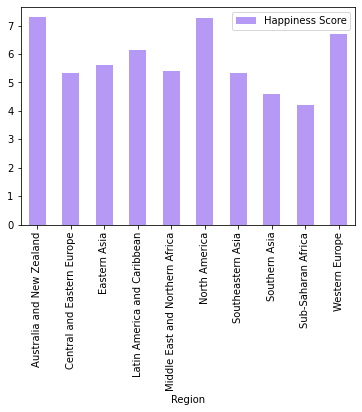

In [14]:
hapdata.groupby('Region').agg({'Happiness Score' : 'mean'}).plot.bar(color = [(.71, .6, .96)])

With the happiness dataset, we see that Australia and New Zealand and North America are the best of the world in terms of happiness score with Western Europe close behind. The worst regions of the world to live in according to happiness score are Sub-Saharan Africa and Southern Asia.

Let's see how that works with the number of countries, though.

<AxesSubplot:>

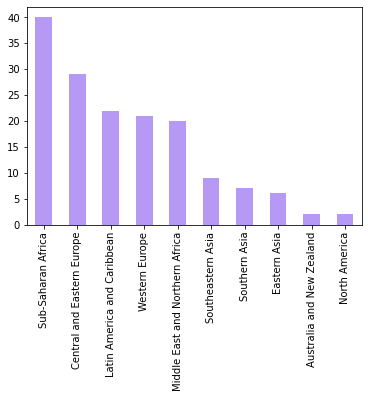

In [15]:
hapdata['Region'].value_counts().plot.bar(color = [(.71, .6, .96)])

North America and Australia/New Zealand by far have the fewest number of countries to consider, so it makes sense that their scores may be at the top.
Meanwhile, Sub-Saharan Africa has the most countries to account for along with the lowest average happiness ranking.
I'm not saying that fewer countries per region = increased happiness, but this is something to consider when asking 'why?'.

### Let's look at some information from the top universities data!

<AxesSubplot:>

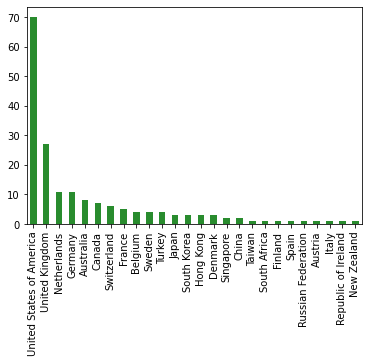

In [16]:
univdata['country'].value_counts().plot.bar(color = [(.16, .55, .18)])

By far, this shows that the United States has the most universities on this list (close to 70 out of 182). But, does that necessarily mean that the schools are *better*?

<AxesSubplot:xlabel='country'>

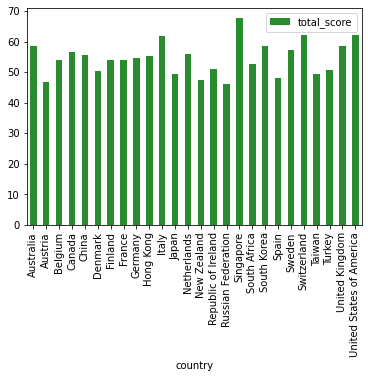

In [17]:
univdata.groupby('country').agg({'total_score' : 'mean'}).plot.bar(color = [(.16, .55, .18)])

Hmmm. So, (apologies that the bar graph is rather crunched), Singapore has, by average score, the best universities in the world. Second to that look like Australia, Italy, Switzerland, and the United States, all pretty close to one another.<br>
Already I can kind of see that Australia and the United States make top appearances in both datasets, but what kind of factors affect this?

<AxesSubplot:>

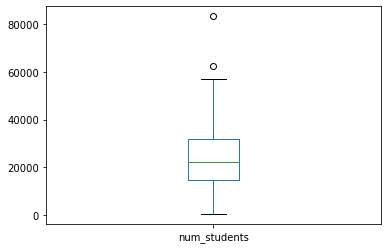

In [18]:
univdata['num_students'].plot.box()

So, most universities fall between what looks like the 18,000-30,000 student range with the average somewhere around 22,000 or so. It would make a lot of sense that countries that educate more of their citizens would be happier, right?<br>
But, how many of these students are actually from that country?

<AxesSubplot:>

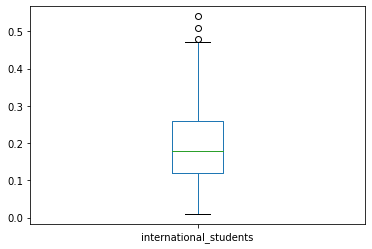

In [19]:
univdata['international_students'].plot.box()

So, it looks like on average, most universities fall somewhere between 12 (or so) % and 25 (or so) % of international students with the average somewhere around 20%. If one in five students are international, that means that the vast majority of students are from the same country. With that, we could assume that it's great that these universities offer so many opportunities to in-country residents, but that assumption would be wrong. It is completely inappropriate to say that every single person who lives in the country has equal access to higher education.<br>
It is at this point that I would love to bring in the female:male ratio and investigate at first this difference. However, as I do not think it would be easily adapted to graph format, I'll briefly explore it through the present data.

In [20]:
print(univdata['female_male_ratio'])

1402     33 : 67
1404    46:54:00
1405    42:58:00
1406    46:54:00
1407     37 : 63
          ...   
1598    61:39:00
1599    58:42:00
1600    54:46:00
1601     34 : 66
1602    56:44:00
Name: female_male_ratio, Length: 182, dtype: object


Out of the 10 values present, six have a majority of male students. If we take that as an example, that means these top-rated universities overwhelmingly accept more male students than female students. However, the data still lacks any detail about nonbinary or non-gender-binary-conforming students, making the dataset truly incomplete.<br>
More demographic information lacking in the dataset include the race of attending students, family income, whether or not students are first-year college students, etc..

That is another thing lacking in the world happiness data. *Who* is actually considered happy? Is it every single citizen in the country whose opinion is taken into account? Is it only the privileged? Are those people taken out of the equation? What time of year was this survey taken? Was it during an especially stressful time of year?

### Final Observations

For my final observations, I'd like to combine the two datasets and see what correlations exist within a heatmap.

In [21]:
#Joining two datasets
df = pd.merge(hapdata, univdata, how='inner', left_on='Country', right_on='country')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,96.6,90.2,83.5,73.2,84.6,18178.0,14.7,0.37,31 : 69,2015
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,98.8,56.9,95.0,61.9,70.9,9666.0,10.5,0.54,27 : 73,2015
2,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,91.2,41.1,81.4,97.7,58.4,12551.0,17.3,0.24,54:46:00,2015
3,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,86.9,33.1,81.4,40.1,53.9,26583.0,6.5,0.19,57:43:00,2015
4,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,96.8,37.2,78.2,65.1,53.8,15668.0,15.0,0.39,61:39:00,2015


Woohoo!

<ipython-input-22-fd82906de511>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


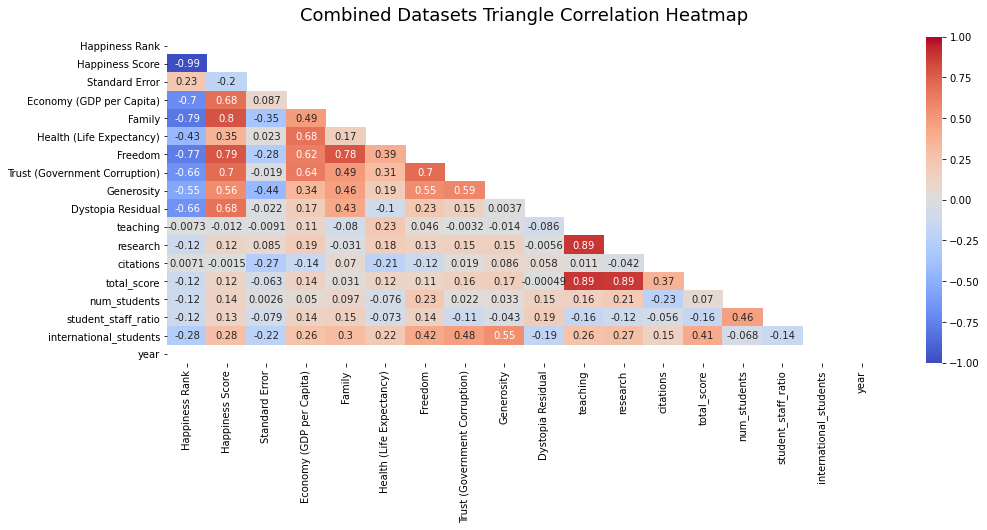

In [22]:
#sns.heatmap(df.corr(), annot=False, fmt=".2f")
#^ That was my original heatmap, but I learned how to make another one with this website:
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
#I chose coolwarm because warm = strong correlation , cool = not strong correlation. I thought the colors were easy to distinguish.
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Combined Datasets Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

What kind of surprises me is that there isn't really any *super* strong correlation between the values of the two datasets. Maybe that's because the values are presented differently and in different categories, or maybe it's because no such relationship exists at all. There is a pretty strong link between Generosity of countries and international students in universities. Maybe it means that the more generous a country is with its citizens, the more likely students from other countries will come to study?<br>
Looking at *weak* correlations, there is no real (strong) link between Happiness Rank and international students, or a university's score and the student:staff ratio. So, though generosity plays a large role with international students, the larger picture does not.

# Final Thoughts

So, throughout the graphs we've made, we see that the higher a country's happiness rank is, the more likely their universities are to have a high rank. Almost.<br>
I think it's important in this project not to confuse correlation with causation. Just because some of the happiest countries also have the best universities does not mean that one influences the other.<br> 
Happiness, according to the heatmap, looks like it is influenced much more by freedom and family than anything else. Perhaps freedom means the freedom to receive an education. Perhaps not.<br>
Being a high ranking university seems to relate the most to the research performed there and the teaching staff. Does having access to great teachers and research opportunities mean that students are happy? It is unclear, but I would assume the answer to be yes. Of course, there are so many more factors that go into 'are you happy or not?'. Another thing I noticed that is not entirely clear in my university dataset are, do the students include graduate students? I think it would be interesting to explore the effect graduate students have versus undergraduate students on a university's ranking, if anything.<br>
Though simple, I think bar graphs are an effective way to visualize a lot of the data in this project. The values depend on the countries they represent, so I think it makes it visually appealing to see them side by side like this. Box plots were also an interesting way to look a little closer at the numerical data within the sets.<br>
I'm glad Kirk and Morgan brought up the heatmap because it felt off, but it wasn't until I read his comment that I understood why! Halving it so that the data appears once was a very helpful suggestion and I think makes the chart look much easier to read. In the same vein, I also changed the color scheme so that it becomes a little easier to read (as well as including values this time!). My original chart looked like this:

<img src = "heatmap.png">

Yeah, it definitely needed some work.<br>
I also touched up the graphs to add a little color because I like my projects to be aesthetically pleasing. :) The original graphs looked like this:

<img src = "originalhappiness.png"> <img src = "originaluniversity.png">

Should I be a little more tech-savvy and/or revisit this project, I think I would make the bar graph colors vary depending on the score (in a similar range as the now heatmap). Purple means happiness and green means university score, but I'm sure I could come up with a color argument to distinguish them.<br>
As I've mentioned in my above explanations, there is a lot missing from this data. Though it's nice to have numbers about countries being happy and universities being successful, but there is no information as to *who* it is talking about. These data sources could be incredibly biased and only talk about privileged citizens. Maybe not. But, I think it's important to consider the data that isn't there. Who isn't there? Who isn't being spoken for? How can we make it that they can speak up?<br>
This project is a good start. Hopefully more data will emerge in the future that allow these other questions to be explored.